In [1]:
import pandas as pd 
import wandb

api = wandb.Api()
entity, project = "rcpaffenroth-wpi", "arxiv-100-epoch-5-17-2023"  
runs = api.runs(entity + "/" + project) 

summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains output keys/values for 
    # metrics such as accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
         if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

runs_df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list
    })

runs_df.to_csv("project.csv")

In [2]:
runs_df

,summary,config,name
0,"{'test_loss': 2.3138601779937744, 'gradients/m...","{'device': None, 'available': False, 'base/see...",sequential2D_MLP_both_random_end_5
1,"{'gradients/graph_3model.0.blocks.(0, 0).U': {...","{'device': None, 'available': False, 'base/see...",sequential2D_sparse_both_random_end_5
2,"{'gradients/model.0.blocks.(1, 2).U': {'values...","{'device': None, 'available': False, 'base/see...",sequential2D_dense_both_random_end_5
3,"{'_timestamp': 1684348129.4746518, 'IterateMod...","{'device': None, 'available': False, 'base/see...",RNN_both_random_end_5
4,"{'_timestamp': 1684347653.109826, 'trainer/glo...","{'device': None, 'available': False, 'base/see...",sequential2D_MLP_both_uniform_end_5
...,...,...,...
115,"{'test_loss': 2.0744194984436035, '_wandb': {'...","{'device': None, 'available': False, 'base/see...",RNN_both_uniform_1
116,"{'_timestamp': 1684343436.3532507, 'IterateMod...","{'device': None, 'available': False, 'base/see...",sequential2D_MLP_both_uniform_1
117,{'IterateModel_validation_epoch_average_loss':...,"{'device': None, 'available': False, 'base/see...",RNN_medium_1
118,"{'gradients/model.0.blocks.(0, 2).U': {'_type'...","{'device': None, 'available': False, 'base/see...",sequential2D_dense_both_uniform_1


<Axes: >

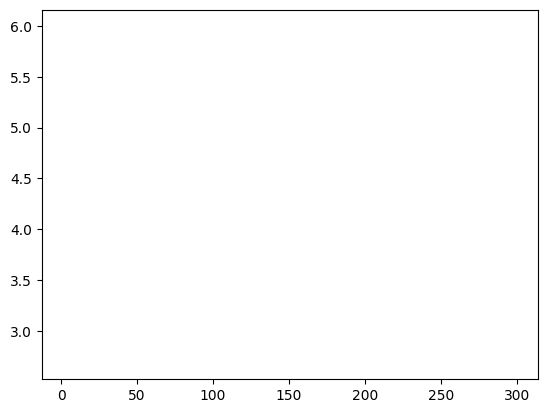

In [3]:
run.history()['validation_loss'].plot()

In [4]:
run.config['data/evaluate_loss']

'all'

In [5]:
run.config['data/name']

'medium'

In [6]:
run.config['model/name']

'sequential2D_dense'

In [13]:
import numpy as np
import matplotlib.pylab as py

In [14]:
runs=wandb.Api().runs(path="rcpaffenroth-wpi/arxiv-100-epoch-5-17-2023", filters={"config.data/evaluate_loss": "all", "config.data/name":"medium", "config.model/name":"sequential2D_sparse"})

(302,)
202
(302,)
202
(302,)
202
(302,)
202
(302,)
202


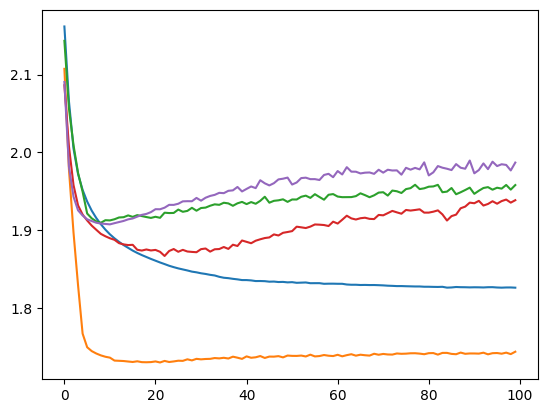

In [16]:
for run in runs:
  data = np.array(run.history()['validation_loss'])
  print(data.shape)
  print(np.count_nonzero(np.isnan(data)))
  py.plot(data[np.logical_not(np.isnan(data))])
  #py.plot(np.ma.masked_invalid(data))
  

In [17]:
np.ma.masked_invalid(data)


masked_array(data=[--, --, 2.0905256271362305, --, --, 1.9814822673797607,
                   --, --, 1.9429466724395752, --, --, 1.925399661064148,
                   --, --, 1.9187616109848022, --, --, 1.9138548374176025,
                   --, --, 1.911637306213379, --, --, 1.9094706773757935,
                   --, --, 1.9084161520004272, --, --, 1.907914400100708,
                   --, --, 1.9073708057403564, --, --, 1.9089038372039795,
                   --, --, 1.910353422164917, --, --, 1.911763310432434,
                   --, --, 1.913822054862976, --, --, 1.9149563312530518,
                   --, --, 1.917311191558838, --, --, 1.9195905923843384,
                   --, --, 1.9207948446273804, --, --, 1.9231265783309937,
                   --, --, 1.9268749952316284, --, --, 1.926787257194519,
                   --, --, 1.9288386106491089, --, --, 1.9324733018875122,
                   --, --, 1.932426929473877, --, --, 1.9338934421539307,
                   --, --, 1.93698